<a href="https://colab.research.google.com/github/ChaeYun430/MachineLearningStudy25/blob/master/test251117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
<class 'numpy.ndarray'> [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88

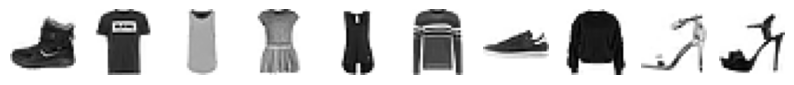

[9 0 0 3 0 2 7 2 5 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
# ----- 훈련용/테스트용 데이터 로딩, 분할, 확인 -----
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print(type(x_train[0]), x_train[0])
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

print(y_train[:10])
print(np.unique(y_train, return_counts=True)) # unsigned int 8bit, 즉 0~255 범위의 정수 타입

In [ ]:
# ----- 정규화 -----
from sklearn.preprocessing import OneHotEncoder

def scaler_flatten_images(x_data):
  x_data = x_data / 255.0
  x_data = x_data.reshape(-1, 28*28)
  return x_data

x_train_scaled = scaler_flatten_images(x_train)
x_test_scaled = scaler_flatten_images(x_test)

In [ ]:
# ----- 검증용 데이터 분리(교차검증 대신)-----
from sklearn.model_selection import train_test_split

x_train, x_vali, y_train, y_vali = train_test_split(x_train_scaled, y_train, test_size=0.2)

In [ ]:
# ----- 모델 생성, 훈련, 검증 -----
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential([dense])
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_vali, y_vali)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7358 - loss: 0.7797
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8394 - loss: 0.4753
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8444 - loss: 0.4573
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8538 - loss: 0.4365
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8571 - loss: 0.4255
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8435 - loss: 0.4661


[0.44786372780799866, 0.847083330154419]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7211 - loss: 0.7876 - val_accuracy: 0.8461 - val_loss: 0.4084
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8468 - loss: 0.4257 - val_accuracy: 0.8612 - val_loss: 0.3717
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8607 - loss: 0.3790 - val_accuracy: 0.8670 - val_loss: 0.3580
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8676 - loss: 0.3602 - val_accuracy: 0.8792 - val_loss: 0.3370
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8738 - loss: 0.3377 - val_accuracy: 0.8808 - val_loss: 0.3218
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8791 - loss: 0.3249 - val_accuracy: 0.8813 - val_loss: 0.3111
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8817 - loss: 0.3167 - val_accuracy: 0.8838 - val_loss: 0.3150
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8832 - loss: 0.3092 - val_accuracy: 0.

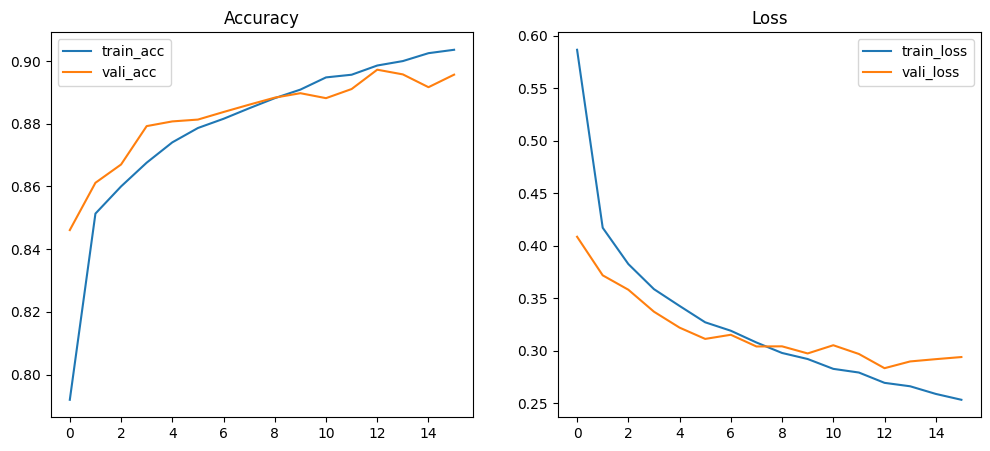

검증 정확도: 0.9101666808128357
테스트 정확도: 0.8776999711990356


In [ ]:
# 0. 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# 1. 데이터 불러오기(Fashion-MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 2. 데이터 전처리: 정규화 + 2D->1D
def scaler_flatten_images(x_data):
    x_data = x_data / 255.0
    x_data = x_data.reshape(-1, 28*28)
    return x_data

x_train_scaled = scaler_flatten_images(x_train)
x_test_scaled = scaler_flatten_images(x_test)

# 3. 훈련/검증 데이터 분리
x_train, x_vali, y_train, y_vali = train_test_split(x_train_scaled, y_train, test_size=0.2)

# 4. 모델 객체 생성
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. 모델 요약
model.summary()

# 6. 모델 컴파일: 최적화 기법 적용
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7. 조기 종료 콜백
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 8. 모델 훈련
history = model.fit(
    x_train, y_train,
    validation_data=(x_vali, y_vali),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop]
)

# 9. 훈련 결과 그래프
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='vali_acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='vali_loss')
plt.title('Loss')
plt.legend()
plt.show()

# 10. 모델 저장
model.save('test251117_model.keras')

# 11. 저장된 모델 불러오기(검증 정확도 확인)
loaded_model = keras.models.load_model('test251117_model.keras')
val_score = loaded_model.evaluate(x_vali, y_vali, verbose=0)
print("검증 정확도:", val_score[1])

# 12. 테스트 점수 확인
test_score = loaded_model.evaluate(x_train, y_test, verbose=0)
print("테스트 정확도:", test_score[1])


In [ ]:
print(x_train.shape, y_train.shape)
print(x_vali.shape, y_vali.shape)
print(x_test.shape, y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)
(10000, 28, 28) (10000,)
